In [93]:
# Import necessary tools
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings  
warnings.filterwarnings('ignore')  # Ignore warning messages

# Make graphs look better
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Set default graph size

print("✅ All tools are ready to use!")

✅ All tools are ready to use!


In [94]:
df = pd.read_csv(r"C:\Users\khush\Downloads\PBI\Lab-Data\Ola_data.csv")  

# Let's take a quick peek at the first 5 rows
print("🔍 First look at your data:")
df

🔍 First look at your data:


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 3:15:00,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 9:06:00,9:06:00,CNR9488489435,Success,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,NaN,NaN,No,NaN,111,Cash,41,3.6,3.8,https://cdn-icons-png.flaticon.com/128/11409/1...
103020,2024-07-31 15:12:00,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,NaN,NaN,No,NaN,1097,UPI,17,4.3,3.3,https://cdn-icons-png.flaticon.com/128/16526/1...
103021,2024-07-31 13:59:00,13:59:00,CNR1286151233,Success,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,No,NaN,2201,Cash,37,3.6,3.2,https://cdn-icons-png.flaticon.com/128/9983/99...
103022,2024-07-31 14:56:00,14:56:00,CNR2027162035,Success,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,No,NaN,267,UPI,47,3.4,3.1,https://cdn-icons-png.flaticon.com/128/6839/68...


In [95]:
print(f"\n📊 Your dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"That means {df.shape[0]} rides and {df.shape[1]} pieces of information per ride")


📊 Your dataset has 103024 rows and 20 columns
That means 103024 rides and 20 pieces of information per ride


# Basic Information About Dataset

In [96]:
# Data types of each column
df.dtypes


Date                           object
Time                           object
Booking_ID                     object
Booking_Status                 object
Customer_ID                    object
Vehicle_Type                   object
Pickup_Location                object
Drop_Location                  object
V_TAT                         float64
C_TAT                         float64
Canceled_Rides_by_Customer     object
Canceled_Rides_by_Driver       object
Incomplete_Rides               object
Incomplete_Rides_Reason        object
Booking_Value                   int64
Payment_Method                 object
Ride_Distance                   int64
Driver_Ratings                float64
Customer_Rating               float64
Vehicle Images                 object
dtype: object

In [97]:
# Memory usage
df.memory_usage().sum() / 1024**2


np.float64(15.720340728759766)

In [98]:
# Basic statistics for numerical columns
df.describe()

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
std,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000


In [99]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

# Check for Missing Values

In [100]:
# Count empty cells in each column
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [101]:
# Calculate percentage of missing values
(df.isnull().sum() / len(df)) * 100

Date                           0.000000
Time                           0.000000
Booking_ID                     0.000000
Booking_Status                 0.000000
Customer_ID                    0.000000
Vehicle_Type                   0.000000
Pickup_Location                0.000000
Drop_Location                  0.000000
V_TAT                         37.910584
C_TAT                         37.910584
Canceled_Rides_by_Customer    89.809171
Canceled_Rides_by_Driver      82.107082
Incomplete_Rides              37.910584
Incomplete_Rides_Reason       96.189237
Booking_Value                  0.000000
Payment_Method                37.910584
Ride_Distance                  0.000000
Driver_Ratings                37.910584
Customer_Rating               37.910584
Vehicle Images                 0.000000
dtype: float64

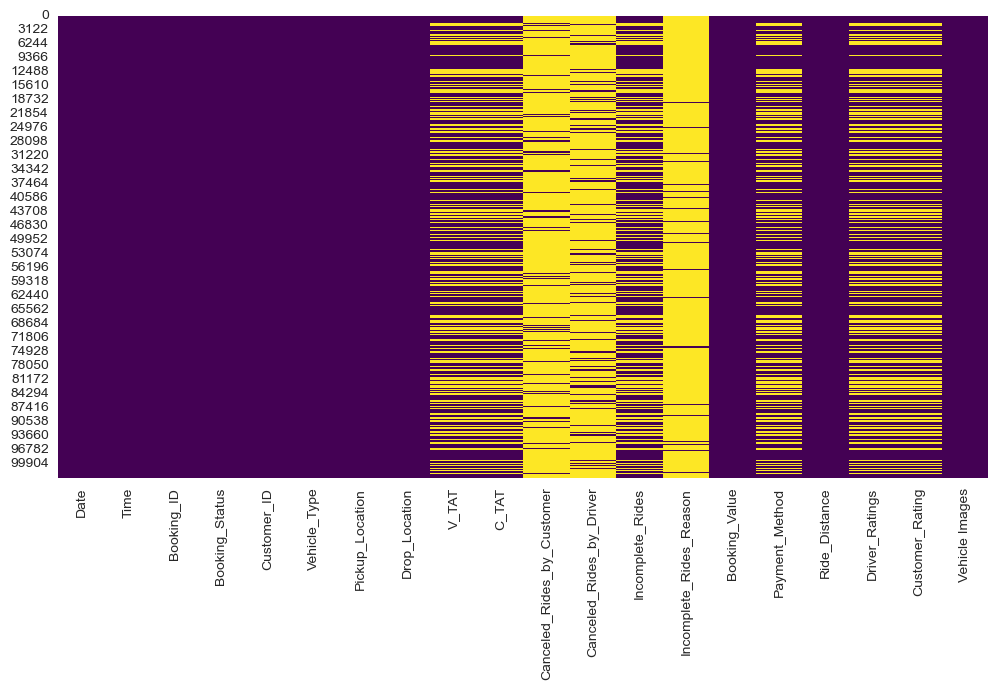

In [102]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Explore Categorical Variables

In [103]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [104]:
# Show unique values in each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Date: 40214 unique values
Time: 1440 unique values
Booking_ID: 103024 unique values
Booking_Status: 4 unique values
Customer_ID: 94544 unique values
Vehicle_Type: 7 unique values
Pickup_Location: 50 unique values
Drop_Location: 50 unique values
Canceled_Rides_by_Customer: 5 unique values
Canceled_Rides_by_Driver: 4 unique values
Incomplete_Rides: 2 unique values
Incomplete_Rides_Reason: 3 unique values
Payment_Method: 4 unique values
Vehicle Images: 7 unique values


In [105]:
# Value counts for a specific column (example: Vehicle_Type)
df['Vehicle_Type'].value_counts()

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64

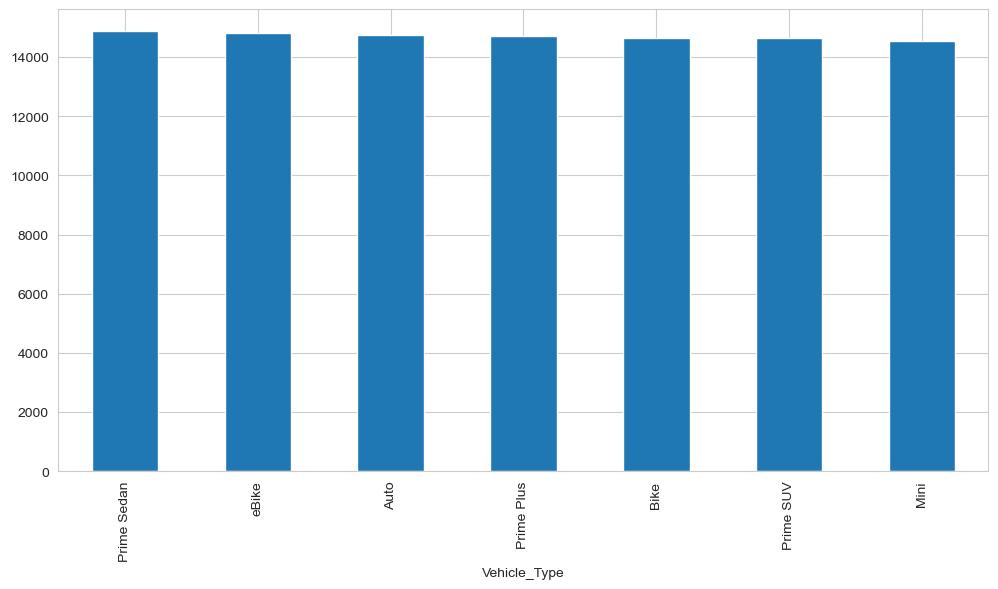

In [106]:
# Visualize categorical distribution
df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

# Explore Numerical Variables

In [124]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [125]:
# Basic statistics for each numerical column
for col in numerical_cols:
    print(col)
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")
    print("---")

V_TAT
Mean: 170.87695217846704
Median: 168.0
Min: 35.0, Max: 308.0
---
C_TAT
Mean: 84.87337220754452
Median: 85.0
Min: 25.0, Max: 145.0
---
Booking_Value
Mean: 548.7518830563752
Median: 386.0
Min: 100, Max: 2999
---
Ride_Distance
Mean: 14.189926619040223
Median: 8.0
Min: 0, Max: 49
---
Driver_Ratings
Mean: 3.9974565010083327
Median: 4.0
Min: 3.0, Max: 5.0
---
Customer_Rating
Mean: 3.9983131927400057
Median: 4.0
Min: 3.0, Max: 5.0
---


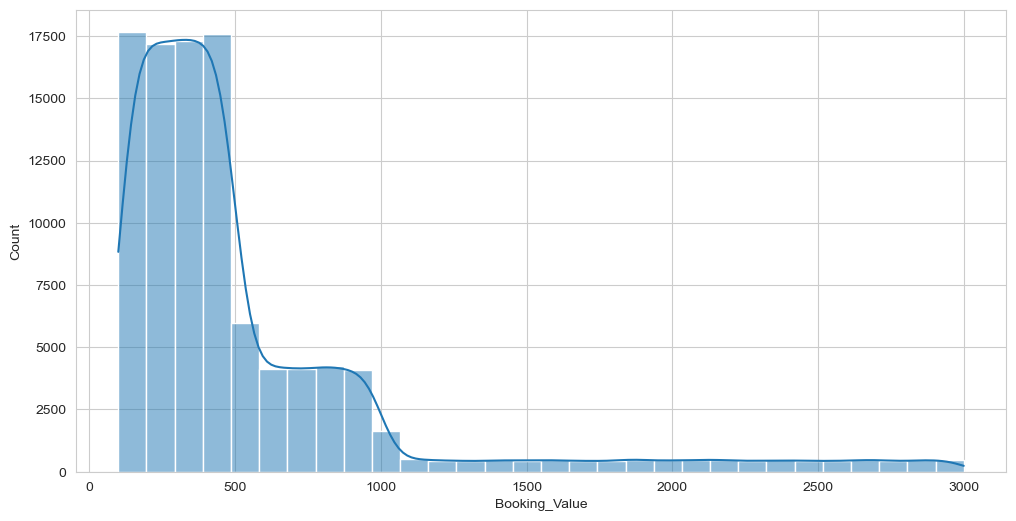

In [126]:
# Create histogram for a numerical column
sns.histplot(df['Booking_Value'], kde=True, bins=30)
plt.show()

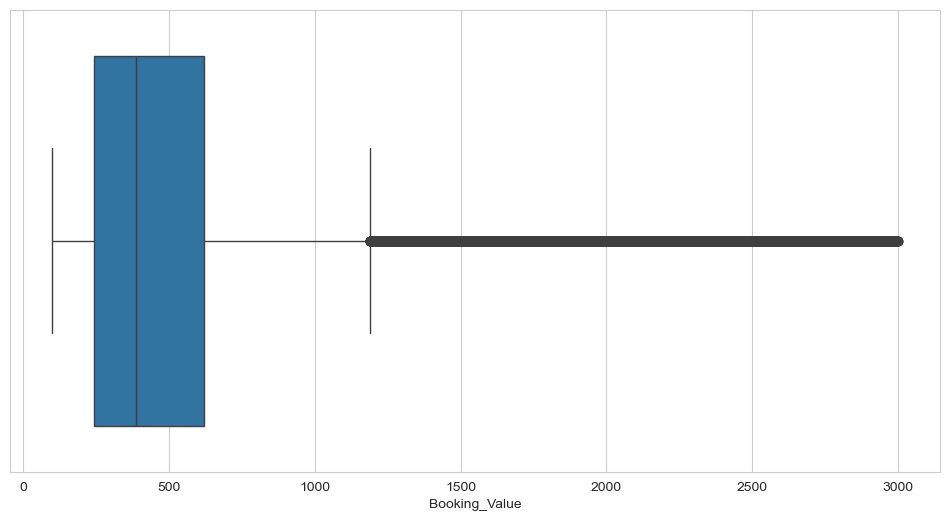

In [127]:
# Create box plot to see outliers
sns.boxplot(x=df['Booking_Value'])
plt.show()

# Check for Outliers

In [128]:
# Calculate IQR for a column
Q1 = df['Booking_Value'].quantile(0.25)
Q3 = df['Booking_Value'].quantile(0.75)
IQR = Q3 - Q1


In [129]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [130]:
# Find outliers
outliers = df[(df['Booking_Value'] < lower_bound) | (df['Booking_Value'] > upper_bound)]
outliers.shape

(8468, 24)

# Time Analysis

In [131]:
# Create datetime column from Date and Time
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [132]:
# Extract time components
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

In [133]:
# Count rides by hour
df['hour'].value_counts().sort_index()

hour
0     4318
1     4329
2     4305
3     4201
4     4263
5     4264
6     4271
7     4304
8     4374
9     4347
10    4334
11    4272
12    4408
13    4285
14    4232
15    4376
16    4261
17    4353
18    4176
19    4271
20    4228
21    4343
22    4283
23    4226
Name: count, dtype: int64

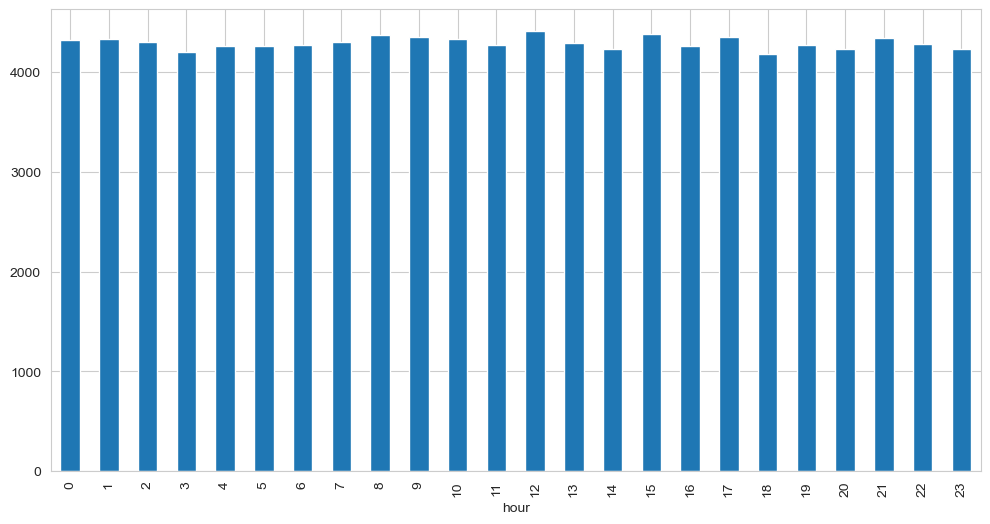

In [134]:
# Plot rides by hour
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.show()

# Correlation Analysis

In [135]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
V_TAT,1.000000,0.000249,-0.003671,-0.011204,-0.002300,0.000574
C_TAT,0.000249,1.000000,-0.004443,0.000074,-0.002815,0.001015
Booking_Value,-0.003671,-0.004443,1.000000,0.000492,-0.001327,0.006231
Ride_Distance,-0.011204,0.000074,0.000492,1.000000,-0.007235,0.009871
Driver_Ratings,-0.002300,-0.002815,-0.001327,-0.007235,1.000000,-0.002807
Customer_Rating,0.000574,0.001015,0.006231,0.009871,-0.002807,1.000000


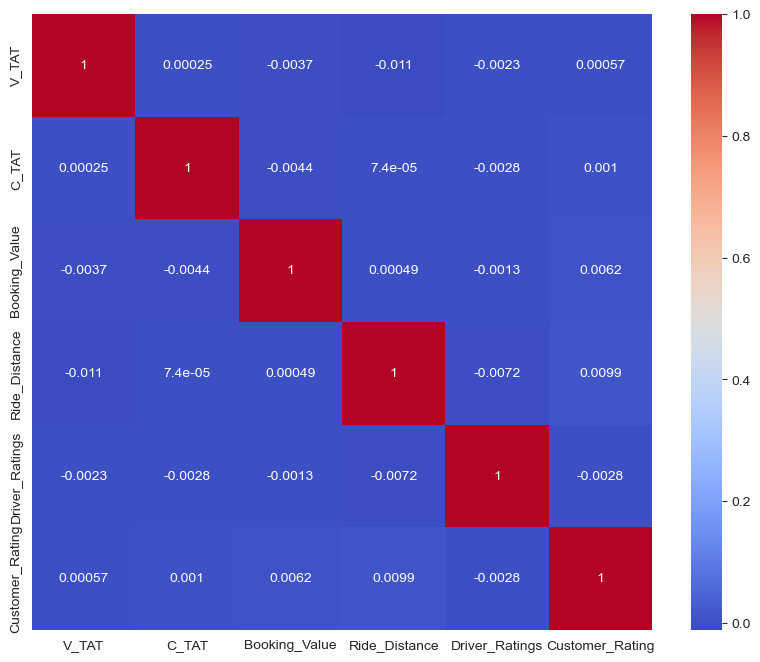

In [136]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Business Questions Analysis

#1. Booking Status analysis

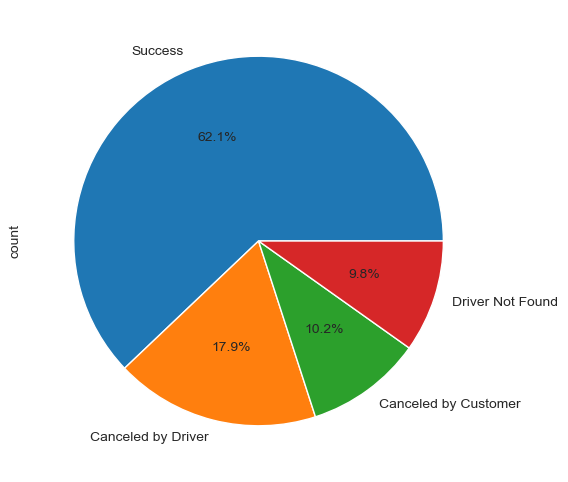

In [164]:
df['Booking_Status'].value_counts()
df['Booking_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#2. Vehicle Type vs Booking Value


In [165]:
df.groupby('Vehicle_Type')['Booking_Value'].mean()

Vehicle_Type
Auto           548.438495
Bike           544.745192
Mini           549.133865
Prime Plus     547.418848
Prime SUV      541.339475
Prime Sedan    557.814882
eBike          552.208626
Name: Booking_Value, dtype: float64

#3. Cancellation analysis (UPDATED)

In [166]:
# Count non-NaN values to see how many rides have cancellation reasons
cancel_by_customer_count = df['Canceled_Rides_by_Customer'].notna().sum()
cancel_by_driver_count = df['Canceled_Rides_by_Driver'].notna().sum()

print(f"Rides with customer cancellation reasons: {cancel_by_customer_count}")
print(f"Rides with driver cancellation reasons: {cancel_by_driver_count}")

# See most common cancellation reasons
if cancel_by_customer_count > 0:
    print("\nTop customer cancellation reasons:")
    print(df['Canceled_Rides_by_Customer'].value_counts().head(10))

if cancel_by_driver_count > 0:
    print("\nTop driver cancellation reasons:")
    print(df['Canceled_Rides_by_Driver'].value_counts().head(10))

Rides with customer cancellation reasons: 10499
Rides with driver cancellation reasons: 18434

Top customer cancellation reasons:
Canceled_Rides_by_Customer
Driver is not moving towards pickup location    3175
Driver asked to cancel                          2670
Change of plans                                 2081
AC is Not working                               1568
Wrong Address                                   1005
Name: count, dtype: int64

Top driver cancellation reasons:
Canceled_Rides_by_Driver
Personal & Car related issue           6542
Customer related issue                 5413
Customer was coughing/sick             3654
More than permitted people in there    2825
Name: count, dtype: int64


#4. Ratings analysis

In [167]:
df['Driver_Ratings'].mean()

np.float64(3.9974565010083327)

In [168]:
df['Customer_Rating'].mean()

np.float64(3.9983131927400057)

#Plot both ratings

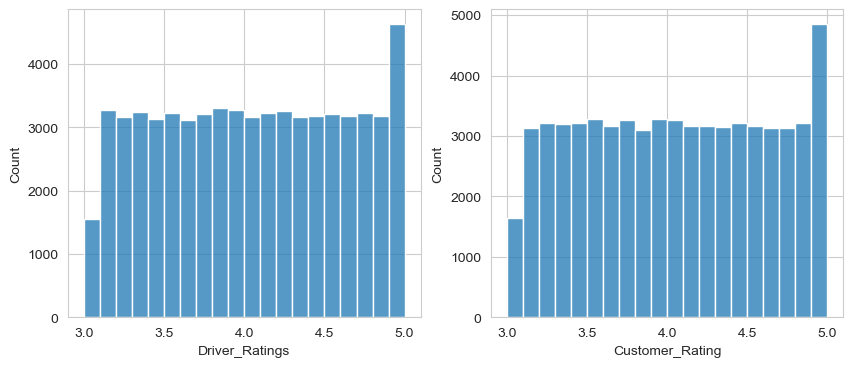

In [169]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Driver_Ratings'], bins=20)
plt.subplot(1, 2, 2)
sns.histplot(df['Customer_Rating'], bins=20)
plt.show()


Cancellation Analysis:
Total rides: 103024
Customer-canceled rides: 10499 (10.2%)
Driver-canceled rides: 18434 (17.9%)


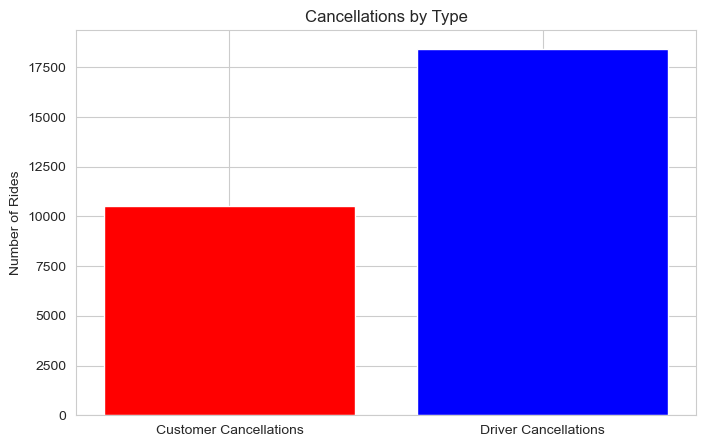

In [161]:
# Calculate cancellation percentages
total_rides = len(df)
customer_cancel_pct = (cancel_by_customer_count / total_rides) * 100
driver_cancel_pct = (cancel_by_driver_count / total_rides) * 100

print(f"\nCancellation Analysis:")
print(f"Total rides: {total_rides}")
print(f"Customer-canceled rides: {cancel_by_customer_count} ({customer_cancel_pct:.1f}%)")
print(f"Driver-canceled rides: {cancel_by_driver_count} ({driver_cancel_pct:.1f}%)")

# Create a simple bar chart
plt.figure(figsize=(8, 5))
cancel_data = {
    'Customer Cancellations': cancel_by_customer_count,
    'Driver Cancellations': cancel_by_driver_count
}
plt.bar(cancel_data.keys(), cancel_data.values(), color=['red', 'blue'])
plt.title('Cancellations by Type')
plt.ylabel('Number of Rides')
plt.show()

# Customer Behavior Analysis

In [142]:
# Customer frequency
df['Customer_ID'].value_counts()
df['Customer_ID'].nunique()

94544

In [143]:
# Average rides per customer
df['Customer_ID'].value_counts().mean()

np.float64(1.0896936875951937)

In [144]:
# Payment methods
df['Payment_Method'].value_counts()

Payment_Method
Cash           35022
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64

In [145]:
# Ride distance categories
df['Ride_Distance'].describe()

count    103024.000000
mean         14.189927
std          15.776270
min           0.000000
25%           0.000000
50%           8.000000
75%          26.000000
max          49.000000
Name: Ride_Distance, dtype: float64

In [146]:
# Create distance categories
bins = [0, 5, 10, 20, 50, 1000]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df['Distance_Category'] = pd.cut(df['Ride_Distance'], bins=bins, labels=labels)

df['Distance_Category'].value_counts()

Distance_Category
Long          32456
Medium        15517
Very Short     8042
Short          7952
Very Long         0
Name: count, dtype: int64

# Quick Reference:

In [147]:
df['Vehicle_Type'].value_counts() # Count categories

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64

In [148]:
df['Booking_Value'].mean()        # Average

np.float64(548.7518830563752)

In [149]:
df['Booking_Value'].median()      # Middle value

386.0

In [150]:
df[df['Booking_Value'] > 500]                     # Filter by value

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,datetime,hour,day_of_week,month,Distance_Category
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,2024-07-02 09:02:00,9,Tuesday,July,Long
8,2024-07-01 19:19:00,19:19:00,CNR5030602354,Driver Not Found,CID999840,Mini,Chamarajpet,Peenya,NaN,NaN,...,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/3202/32...,2024-07-01 19:19:00,19,Monday,July,NaN
9,2024-07-18 1:31:00,1:31:00,CNR6328453219,Canceled by Driver,CID907133,Auto,RT Nagar,Varthur,NaN,NaN,...,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/16526/1...,2024-07-18 01:31:00,1,Thursday,July,NaN
19,2024-07-12 14:44:00,14:44:00,CNR1591113431,Success,CID902781,eBike,Koramangala,Sarjapur Road,245.0,70.0,...,Cash,33,4.2,4.9,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-12 14:44:00,14,Friday,July,Long
20,2024-07-11 20:42:00,20:42:00,CNR3650331573,Success,CID217093,eBike,Basavanagudi,Hulimavu,84.0,25.0,...,Cash,34,4.9,3.4,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-11 20:42:00,20,Thursday,July,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103011,2024-07-31 7:01:00,7:01:00,CNR5427755403,Success,CID406104,Auto,BTM Layout,Cox Town,175.0,135.0,...,UPI,1,3.8,4.2,https://cdn-icons-png.flaticon.com/128/16526/1...,2024-07-31 07:01:00,7,Wednesday,July,Very Short
103014,2024-07-31 17:11:00,17:11:00,CNR8606968614,Driver Not Found,CID259664,Bike,Banashankari,Yelahanka,NaN,NaN,...,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-31 17:11:00,17,Wednesday,July,NaN
103016,2024-07-31 9:20:00,9:20:00,CNR3395373353,Driver Not Found,CID355268,Prime Sedan,Malleshwaram,Tumkur Road,NaN,NaN,...,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...,2024-07-31 09:20:00,9,Wednesday,July,NaN
103020,2024-07-31 15:12:00,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,...,UPI,17,4.3,3.3,https://cdn-icons-png.flaticon.com/128/16526/1...,2024-07-31 15:12:00,15,Wednesday,July,Medium


In [151]:
df[(df['Booking_Value'] > 500) & (df['Ride_Distance'] > 10)]  # Multiple conditions

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,datetime,hour,day_of_week,month,Distance_Category
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,2024-07-02 09:02:00,9,Tuesday,July,Long
19,2024-07-12 14:44:00,14:44:00,CNR1591113431,Success,CID902781,eBike,Koramangala,Sarjapur Road,245.0,70.0,...,Cash,33,4.2,4.9,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-12 14:44:00,14,Friday,July,Long
20,2024-07-11 20:42:00,20:42:00,CNR3650331573,Success,CID217093,eBike,Basavanagudi,Hulimavu,84.0,25.0,...,Cash,34,4.9,3.4,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-11 20:42:00,20,Thursday,July,Long
28,2024-07-30 19:44:00,19:44:00,CNR6805579107,Success,CID810214,Prime SUV,Indiranagar,Indiranagar,35.0,145.0,...,Cash,20,4.0,4.4,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-30 19:44:00,19,Tuesday,July,Medium
31,2024-07-27 6:18:00,6:18:00,CNR7979458138,Success,CID978509,eBike,Frazer Town,Indiranagar,189.0,65.0,...,Cash,38,4.8,4.7,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-27 06:18:00,6,Saturday,July,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102980,2024-07-31 16:50:00,16:50:00,CNR7017377030,Success,CID727294,Prime SUV,KR Puram,Rajajinagar,196.0,70.0,...,Cash,13,4.8,4.2,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-31 16:50:00,16,Wednesday,July,Medium
102995,2024-07-31 15:55:00,15:55:00,CNR9940959929,Success,CID799236,eBike,Kammanahalli,Sahakar Nagar,231.0,65.0,...,UPI,19,4.9,4.4,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-31 15:55:00,15,Wednesday,July,Medium
103000,2024-07-31 21:07:00,21:07:00,CNR9879669872,Success,CID748317,eBike,Langford Town,Hennur,84.0,70.0,...,Cash,29,3.9,4.5,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-31 21:07:00,21,Wednesday,July,Long
103020,2024-07-31 15:12:00,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,...,UPI,17,4.3,3.3,https://cdn-icons-png.flaticon.com/128/16526/1...,2024-07-31 15:12:00,15,Wednesday,July,Medium


# Some more Visualizations

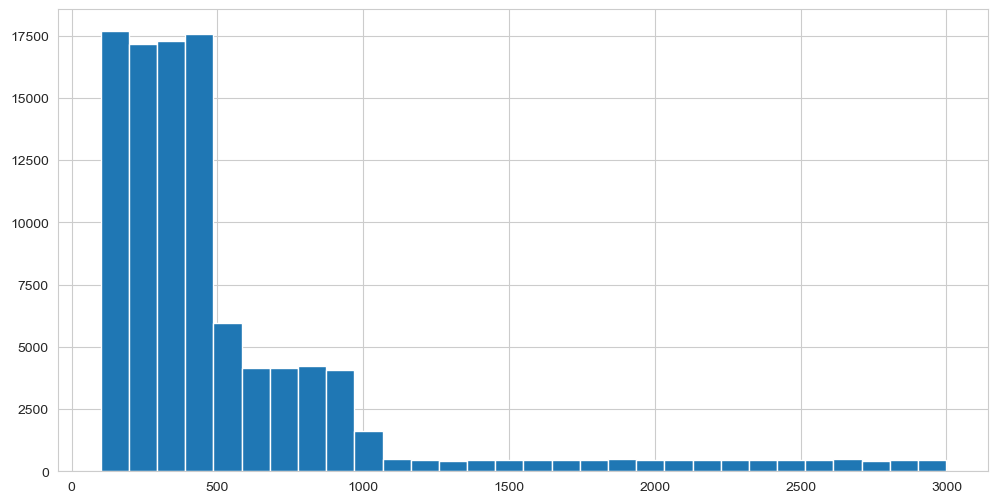

In [152]:
# Histogram
df['Booking_Value'].hist(bins=30)
plt.show()

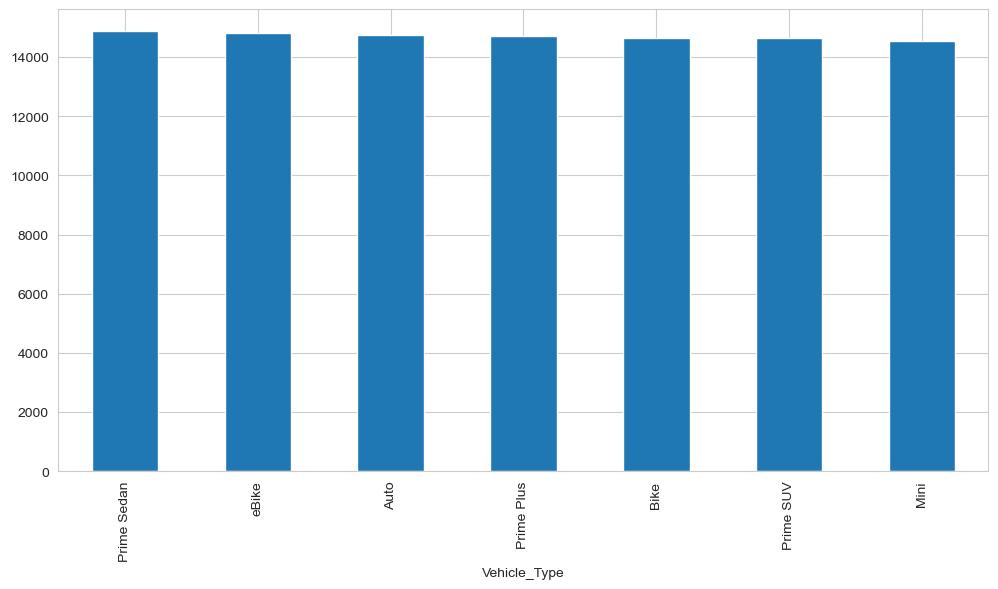

In [153]:
# Bar chart
df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

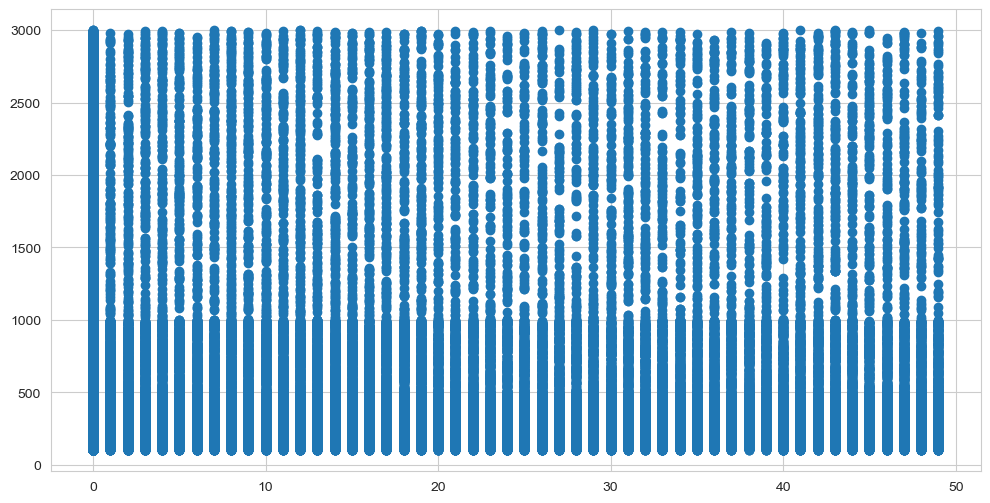

In [154]:
# Scatter plot
plt.scatter(df['Ride_Distance'], df['Booking_Value'])
plt.show()

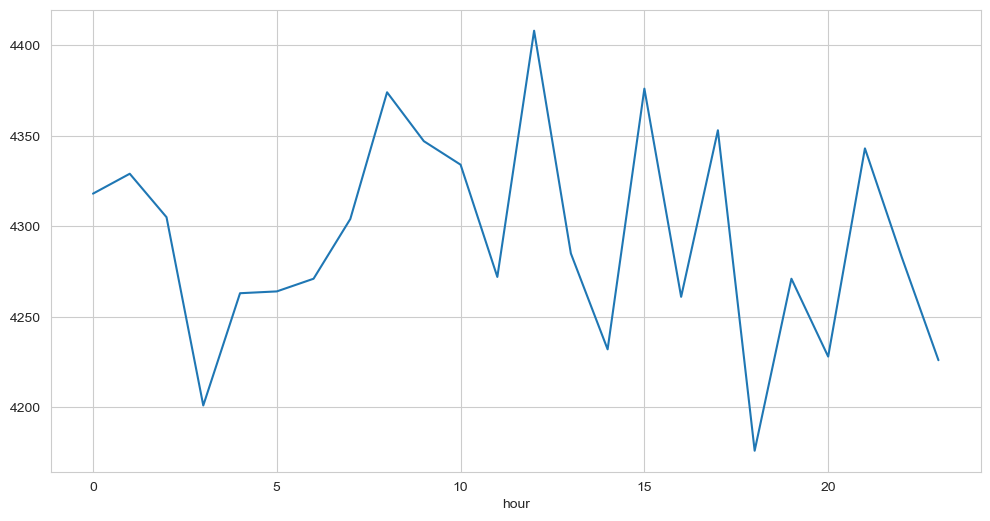

In [155]:
# Line plot (for time series)
df.groupby('hour').size().plot(kind='line')
plt.show()

#  Save Results

In [156]:
# Save the analyzed data
df.to_csv('ola_rides_analyzed.csv', index=False)

In [157]:
# Create summary statistics
summary = {
    'total_rides': len(df),
    'unique_customers': df['Customer_ID'].nunique(),
    'avg_booking_value': df['Booking_Value'].mean(),
    'completion_rate': (df[df['Booking_Status'] == 'Completed'].shape[0] / len(df)) * 100
}

In [158]:
# Convert to DataFrame and save
summary_df = pd.DataFrame([summary])
summary_df.to_csv('summary_statistics.csv', index=False)